# FE621 Assigniment 5 Junyu Lu

## Problem 1

### (a) From Tylor Expansion

$$ f(x+h)=f(x)+f^{'}(x)h+\frac{1}{2}f^{''}(x)h^2+\frac{1}{6}f^{'''}(x)h^3+O(h^4)$$
$$f(x-h)=f(x)-f^{'}(x)h+\frac{1}{2}f^{''}(x)h^2-\frac{1}{6}f^{'''}(x)h^3+O(h^4)$$
$$f(x-2h)=f(x)-2f^{'}(x)h+4\frac{1}{2}f^{''}(x)h^2-8\frac{1}{6}f^{'''}(x)h^3+O(h^4)$$
#### So we expand $\Delta_h^{(3)}f(x)$ as:
$$ \Delta_h^{(3)}f(x)=\frac{1}{6h}\left[2f(x)+2f^{'}(x)h+f^{''}h^2+\frac{2}{6}f^{'''}h^3+O(h^4)+3f-6f+6f'h-3f''h^2+f'''h^3+O(h^4)+f-f'2h+\frac{1}{2}f''(2h)^2-\frac{1}{6}f'''(2h)^3+O(h^4)\right]$$
$$=\frac{1}{6h}\left[ (2+3+1-6)f+6f'h+0f''h^2+0f'''h^3+O(h^4)\right]$$
$$ = \frac{6f'+O(h^4)}{6h}=f'+O(h^3)$$

### (b)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
x0 = 1
h = np.linspace(0.001,1,10000)
ER0 = []
ER1 = []
ER = []
for i in h:
    e0 = np.cos(x0) - (np.sin(x0+i)-2*np.sin(x0)+np.sin(x0-i))/(2*i)
    e1 = np.cos(x0) - (np.sin(x0+i)-np.sin(x0))/i
    e = np.cos(x0) - (2*np.sin(x0+i)+3*np.sin(x0)-6*np.sin(x0-i)+np.sin(x0-2*i))/(6*i)
    
    ER0.append(e0)
    ER1.append(e1)
    ER.append(e)
    
log_ER0 = np.log(np.abs(ER0))
log_ER1 = np.log(np.abs(ER1))
log_ER = np.log(np.abs(ER))

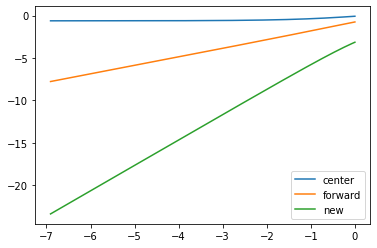

In [7]:
plt.plot(np.log(h),log_ER0,label='center')
plt.plot(np.log(h),log_ER1,label='forward')
plt.plot(np.log(h),log_ER,label='new')
plt.legend()

### (c)

In [14]:
slope_C, a = np.polyfit(np.log(h), log_ER0, deg = 1)
slope_F, b = np.polyfit(np.log(h), log_ER1, deg = 1)
slope_N, c= np.polyfit(np.log(h), log_ER, deg = 1)
print('Slope Center equals ',slope_C,', Slope Forward equals ',slope_F,', Slope New equals ',slope_N)

Slope Center equals  0.14474155731386373 , Slope Forward equals  1.0325284122441816 , Slope New equals  2.88266388153728


## Problem 2 Explict Method

In [15]:
# Parameters
K = 10
r = 0.05
sigma = 0.2
T = 0.5
M = 100

#### European Put Option

In [45]:
def Euro_put_price(s,dx):
    N = M
    Nj = N
    dt = T/N
    nu = r - (sigma**2)/2
    edx = np.exp(dx)
    pu = 0.5*dt*((sigma/dx)**2 + nu/dx)
    pd = 0.5*dt*((sigma/dx)**2 - nu/dx)
    pm = 1 - pu - pd
    
    S = np.zeros((2*Nj+1,1))
    S[0] = s*np.exp(-Nj*dx)
    for i in range(1,2*Nj+1):
        S[i] = S[i-1]*edx
        
    u = np.zeros((2*Nj+1,N+1))
    for i in range(0, 2*Nj+1):
        u[i,N] = np.exp(-r*T)*max(0,K-S[i])
        
    for i in range(N-1,-1,-1):
        for j in range(1,2*Nj):
            u[j,i] = pu*u[j+1, i+1] + pm*u[j,i+1] + pd*u[j-1,i+1]
        u[0,i] = u[1,i]
        u[2*Nj,i] = u[2*Nj-1,i] + (S[Nj]-S[Nj-1])
            
    return u[N,0]

In [46]:
s = [i for i in range(4,17)]
dx_1 = (np.sqrt(2))/100
dx_2 = (np.sqrt(2))/50
dx_0 = (np.sqrt(2))/200

In [47]:
price_0 = []
price_1 = []
price_2 = []

In [48]:
for i in s:
    p0 = Euro_put_price(i,dx_0)
    price_0.append(round(p0,4))
    p1 = Euro_put_price(i,dx_1)
    price_1.append(round(p1,4))
    p2 = Euro_put_price(i,dx_2)
    price_2.append(round(p2,4))
    
print(price_0)
print(price_1)
print(price_2)

[2.367426539604418e+68, 1.4700535954755246e+67, 2.639716645038615e+68, -1.4593866319155085e+71, 8.194492635625624e+76, 3.404265792596218e+80, -2.948937164120024e+81, 9.161711245636408e+79, -2.7767206162103797e+78, 9.022652273184528e+75, 6.778136701182201e+71, 6.916885980920346e+67, -4.946025181338527e+62]
[5.7531, 4.7531, 3.7532, 2.7567, 1.7982, 0.9884, 0.4406, 0.1614, 0.0486, 0.0123, 0.0027, 0.0005, 0.0001]
[5.7531, 4.7531, 3.7532, 2.757, 1.7986, 0.9883, 0.4399, 0.161, 0.0487, 0.0125, 0.0028, 0.0006, 0.0001]


In [49]:
res1 = pd.DataFrame()
res1['S'] = s
res1['alpha < 0.5'] = price_2
res1['alpha = 0.5'] = price_1
res1['alpha > 0.5'] = price_0

In [50]:
res1

,S,alpha < 0.5,alpha = 0.5,alpha > 0.5
0,4,5.7531,5.7531,2.367427e+68
1,5,4.7531,4.7531,1.470054e+67
2,6,3.7532,3.7532,2.639717e+68
3,7,2.7570,2.7567,-1.459387e+71
4,8,1.7986,1.7982,8.194493e+76
5,9,0.9883,0.9884,3.404266e+80
6,10,0.4399,0.4406,-2.948937e+81
7,11,0.1610,0.1614,9.161711e+79
8,12,0.0487,0.0486,-2.776721e+78
9,13,0.0125,0.0123,9.022652e+75


In [51]:
from math import log, sqrt, pi, exp

In [52]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

def bs_put(S,K,T,r,sigma): 
    return bs_call(S,K,T,r,sigma) - S + K * exp(-r * T)

In [53]:
price_bs = []

for i in s:
    price = round(bs_put(i,T,K,r,sigma),4)
    price_bs.append(price)

In [54]:
res2 = res1.copy()
res2['exact'] = price_bs
res2

,S,alpha < 0.5,alpha = 0.5,alpha > 0.5,exact
0,4,5.7531,5.7531,2.367427e+68,0.0
1,5,4.7531,4.7531,1.470054e+67,0.0
2,6,3.7532,3.7532,2.639717e+68,0.0
3,7,2.7570,2.7567,-1.459387e+71,0.0
4,8,1.7986,1.7982,8.194493e+76,0.0
5,9,0.9883,0.9884,3.404266e+80,0.0
6,10,0.4399,0.4406,-2.948937e+81,0.0
7,11,0.1610,0.1614,9.161711e+79,0.0
8,12,0.0487,0.0486,-2.776721e+78,0.0
9,13,0.0125,0.0123,9.022652e+75,0.0


#### American Put Option

In [55]:
def Amer_put_price(s,dx):
    N = M
    Nj = N
    dt = T/N
    nu = r - (sigma**2)/2
    edx = np.exp(dx)
    pu = 0.5*dt*((sigma/dx)**2 + nu/dx)
    pd = 0.5*dt*((sigma/dx)**2 - nu/dx)
    pm = 1 - pu - pd
    
    S = np.zeros((2*Nj+1,1))
    S[-Nj] = s*np.exp(-Nj*dx)
    for i in range(-Nj+1,Nj+1):
        S[i] = S[i-1]*edx
        
    u = np.zeros((2,2*Nj+1))
    for i in range(-Nj, Nj+1):
        u[0,i] = max(0,K-S[i])
        
    for i in range(N-1,-1,-1):
        for j in range(-Nj+1, Nj):
            u[1,j] = pu*u[0, j+1] + pm*u[0,j] + pd*u[0,j-1]
        u[1,-Nj] = u[1,-Nj+1]+(S[-Nj+1]-S[-Nj])
        u[1,Nj] = u[1,Nj-1]
        
        for k in range(-Nj,Nj+1):
            u[0,k] = max(u[1,k],K-S[k])
            
    return u[0,0]

In [56]:
for i in s:
    p0 = Euro_put_price(i,dx_0)
    price_0.append(round(p0,4))
    p1 = Euro_put_price(i,dx_1)
    price_1.append(round(p1,4))
    p2 = Euro_put_price(i,dx_2)
    price_2.append(round(p2,4))
    
print(price_0)
print(price_1)
print(price_2)

[2.367426539604418e+68, 1.4700535954755246e+67, 2.639716645038615e+68, -1.4593866319155085e+71, 8.194492635625624e+76, 3.404265792596218e+80, -2.948937164120024e+81, 9.161711245636408e+79, -2.7767206162103797e+78, 9.022652273184528e+75, 6.778136701182201e+71, 6.916885980920346e+67, -4.946025181338527e+62, 2.367426539604418e+68, 1.4700535954755246e+67, 2.639716645038615e+68, -1.4593866319155085e+71, 8.194492635625624e+76, 3.404265792596218e+80, -2.948937164120024e+81, 9.161711245636408e+79, -2.7767206162103797e+78, 9.022652273184528e+75, 6.778136701182201e+71, 6.916885980920346e+67, -4.946025181338527e+62]
[5.7531, 4.7531, 3.7532, 2.7567, 1.7982, 0.9884, 0.4406, 0.1614, 0.0486, 0.0123, 0.0027, 0.0005, 0.0001, 5.7531, 4.7531, 3.7532, 2.7567, 1.7982, 0.9884, 0.4406, 0.1614, 0.0486, 0.0123, 0.0027, 0.0005, 0.0001]
[5.7531, 4.7531, 3.7532, 2.757, 1.7986, 0.9883, 0.4399, 0.161, 0.0487, 0.0125, 0.0028, 0.0006, 0.0001, 5.7531, 4.7531, 3.7532, 2.757, 1.7986, 0.9883, 0.4399, 0.161, 0.0487, 0.012

## Problem 3 Implicit Methods

### (a)
$$ -\frac{\partial C}{\partial t}=\frac{1}{2}S^2\sigma^2\frac{\partial^2 C}{\partial S^2}+(r-\delta)S\frac{\partial C}{\partial S}-rC$$
$$ -\frac{\partial C}{\partial t}=\frac{1}{2}\sigma^2 \frac{\partial^2 C}{\partial x^2}+v\frac{\partial C}{\partial x}-rC $$
$$ \frac{C_{i,j}-C_{i-1,j}}{\Delta t} = -\frac{1}{2}\sigma^2 \frac{C_{i-1,j+1}-2C_{i-1,j}+C_{i-1,j-1}}{\Delta x^2}-(r-\frac{\sigma^2}{2}\frac{C_{i-1,j+1}-C_{i-1,j-1}}{2\Delta x}+rC_{i-1,j}$$
$$ C_{i,j}=-\frac{\Delta t}{2\Delta x}\left[\frac{\sigma^2}{\Delta x}+(r-\frac{\sigma^2}{2})\right]C_{i-1,j+1}+\left[1+\frac{\sigma^2 \Delta t}{\Delta x^2}+r \right]C_{i-1,j}-\frac{\Delta t}{2\Delta x}\left[\frac{\sigma^2}{\Delta x}-(r-\frac{\sigma^2}{2})\right]C_{i-1,j-1}$$
$$=(\alpha+\beta)C_{j+1}^{i-1}+(1-2\beta)C_j^{i-1}+(-\alpha+\beta)C_{j-1}^{i-1}$$
we have i = m, j = n and C = $\tilde{u}$,so we can get:
$$\tilde{u}_n^{m+1} = (\alpha+\beta)\tilde{u}_{n+1}^{m}+(1-2\beta)\tilde{u}_{n}^{m}+(-\alpha+\beta)\tilde{u}_{n-1}^{m}$$

### (b)


### (d)

In [58]:
def imp_fdm_euro(K,T,S,sig,r,div,N,Nj,dx,option_type):
    dt=T/N
    nu=r-div-0.5*sig**2
    edx=np.exp(dx)
    pu=-0.5*dt*((sig/dx)**2+nu/dx)
    pm=1+dt*(sig/dx)**2+r*dt
    pd=-0.5*dt*((sig/dx)**2-nu/dx)
    
    St=[0]*(2*Nj+1)
    C=np.zeros(shape=(2,2*Nj+1))
    
    St[0]=S*np.exp(-Nj*dx)
    for j in range(1,2*Nj+1):
        St[j]=St[j-1]*edx
    
    if option_type==0:
        sign=1
        lambda_U=St[2*Nj]-St[2*Nj-1]
        lambda_L=0
    elif option_type==1:
        sign=-1
        lambda_U=0
        lambda_L=-1*(St[1]-St[0])
    else:
        print('ERROR')
        return

    for j in range(0,2*Nj+1):
        C[0,j]=max(0,sign*(St[j]-K))
   
    def solve_implicit_trdiagonal_system(C,pu,pm,pd,lambda_L,lambda_U):
        pmp=[0]*(2*Nj+1)
        pp=[0]*(2*Nj+1)
        
        pmp[1]=pm+pd
        pp[1]=C[0,1]+pd*lambda_L
        
        for j in range(2,2*Nj):
            pmp[j]=pm-pu*pd/pmp[j-1]
            pp[j]=C[0,j]-pp[j-1]*pd/pmp[j-1]
            
        C[1,2*Nj]=(pp[2*Nj-1]+pmp[2*Nj-1]*lambda_U)/(pu+pmp[2*Nj-1])
        C[1,2*Nj-1]=C[1,2*Nj]-lambda_U
        
        for j in range(2*Nj-2,0,-1):
            C[1,j]=(pp[j]-pu*C[1,j+1])/pmp[j]
        
        C[1,0]=C[1,1]-lambda_L
        return
    
    for i in range(N-1,-1,-1):
        solve_implicit_trdiagonal_system(C,pu,pm,pd,lambda_L,lambda_U)
        for j in range(0,2*Nj+1):
            C[0,j]=C[1,j]
            
    return C[0,Nj]

In [61]:
K=10
T=0.5
S=50
sig=0.2
r=0.05; 
div=0.03; 
N=100
Nj=3; 
dx=0.2

In [62]:
print(imp_fdm_euro(K,T,S,sig,r,div,N,Nj,dx,0))
print(imp_fdm_euro(K,T,S,sig,r,div,N,Nj,dx,1))

39.51601280476245
0.011763552296507475
